### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import scipy.stats as st

#### Load the dataset

In [2]:
df = pd.read_csv("C:\\Users\\PERSONAL\\Downloads\\Brain-tumor-detection.csv")

In [3]:
df.head()

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


###  Data set  overview
	Area: Area of the tumor detected in mm
    
	Perimeter: The perimeter of the tumor detected
    
	Convex Area: The area of the convex hull covering the tumor 
    
	Solidity: Solidity of the brain tissue. More solidity, higher the chance of having a tumor
    
	Equivalent Diameter: Diameter of the tumor
    
	Major axis, Minor axis : axis information required for finding the stage of the tumor
    
	Eccentricity: Elongation or roundness of the tumor indicating the severity/ aggressiveness
    
	Class: Target variable, 1- Tumor detected, 0- No tumor detected



### Drop the unnamed column

In [4]:
df.drop('Unnamed: 0' , axis = 1,inplace =True)

In [5]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1
...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,(1.2328363649866522e-16+2.0133745759920343j),0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,(1.1025778731209189e-16+1.80064631514748j),0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,(1.815595306633918e-17+0.29650921521176654j),0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,(1.2673089388466744e-17+0.20696725614749073j),0


### Exploratory Data Analysis

In [6]:
import missingno

<Axes: >

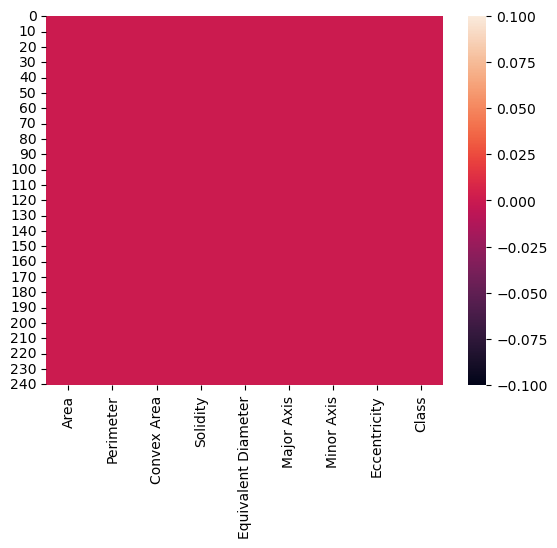

In [7]:
sns.heatmap(df.isnull())

<Axes: >

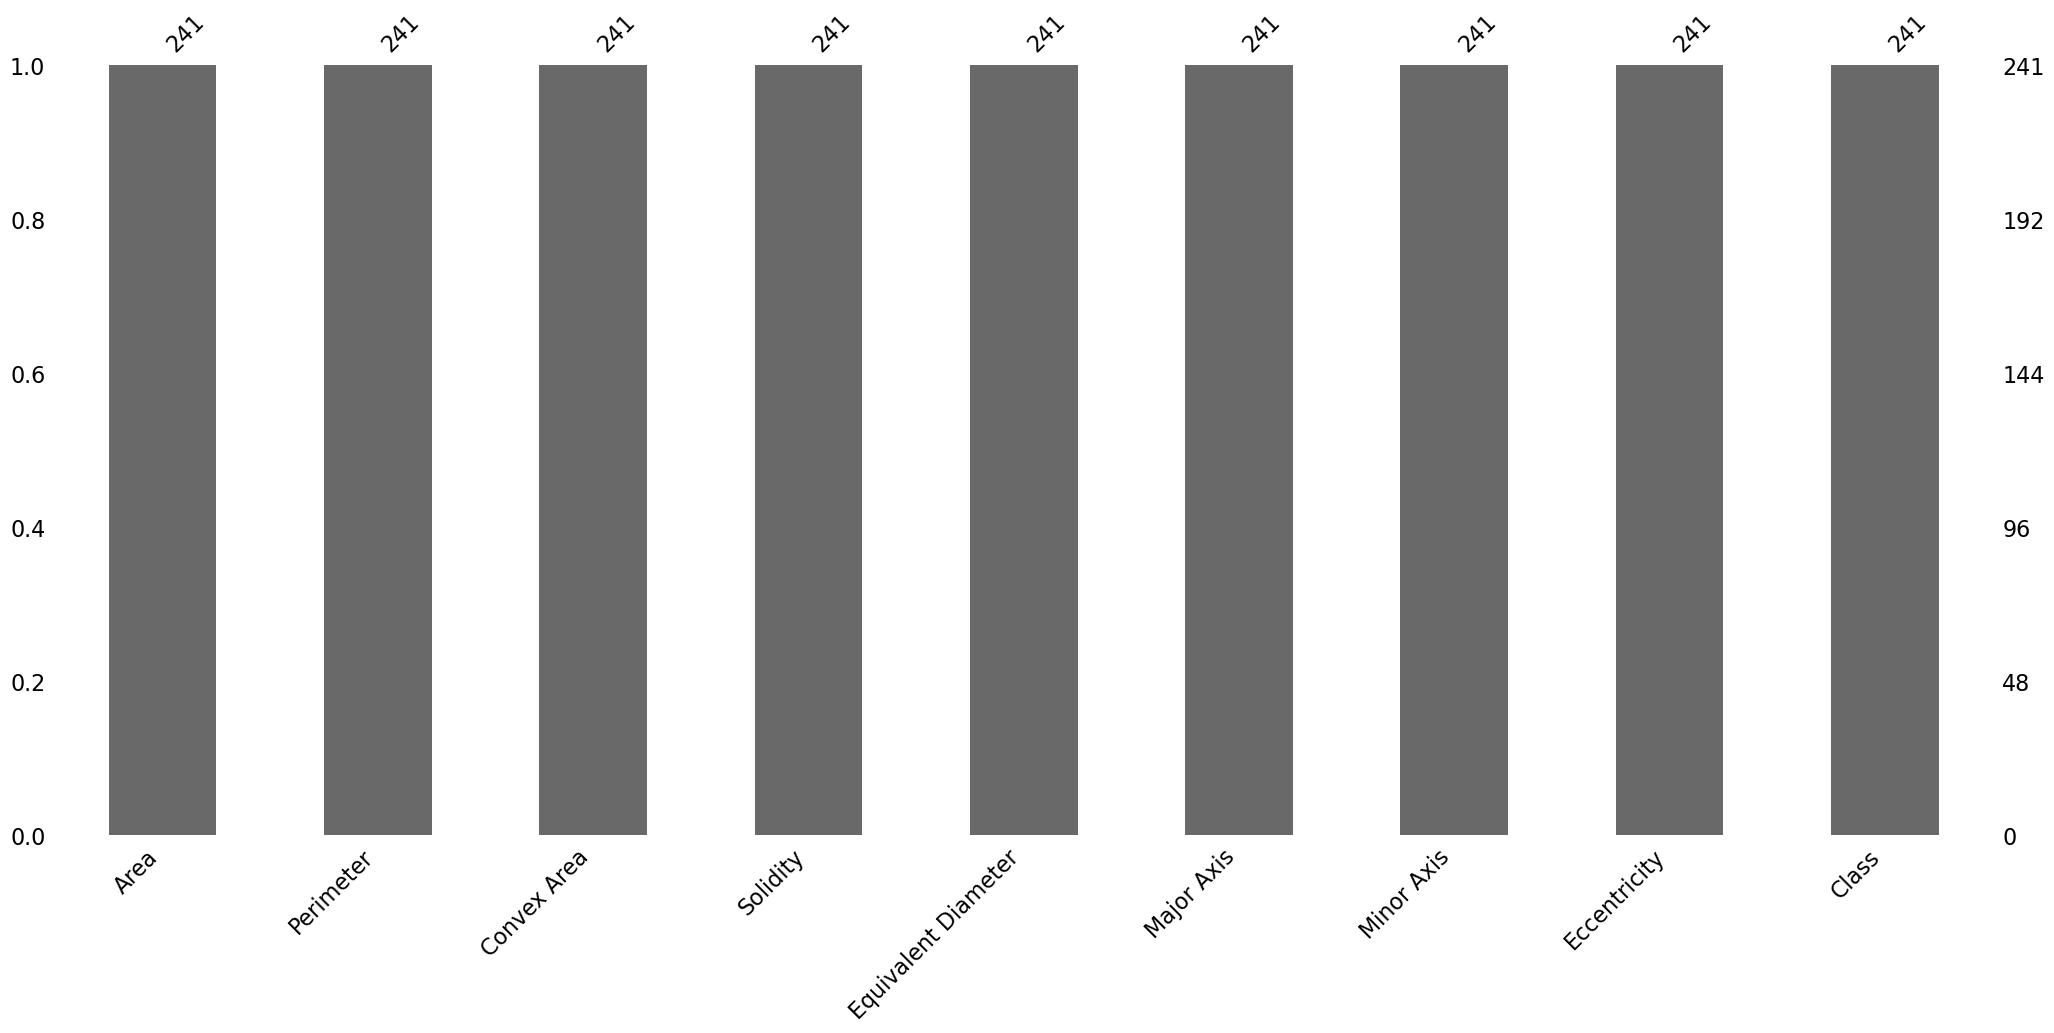

In [8]:
missingno.bar(df)

<Axes: >

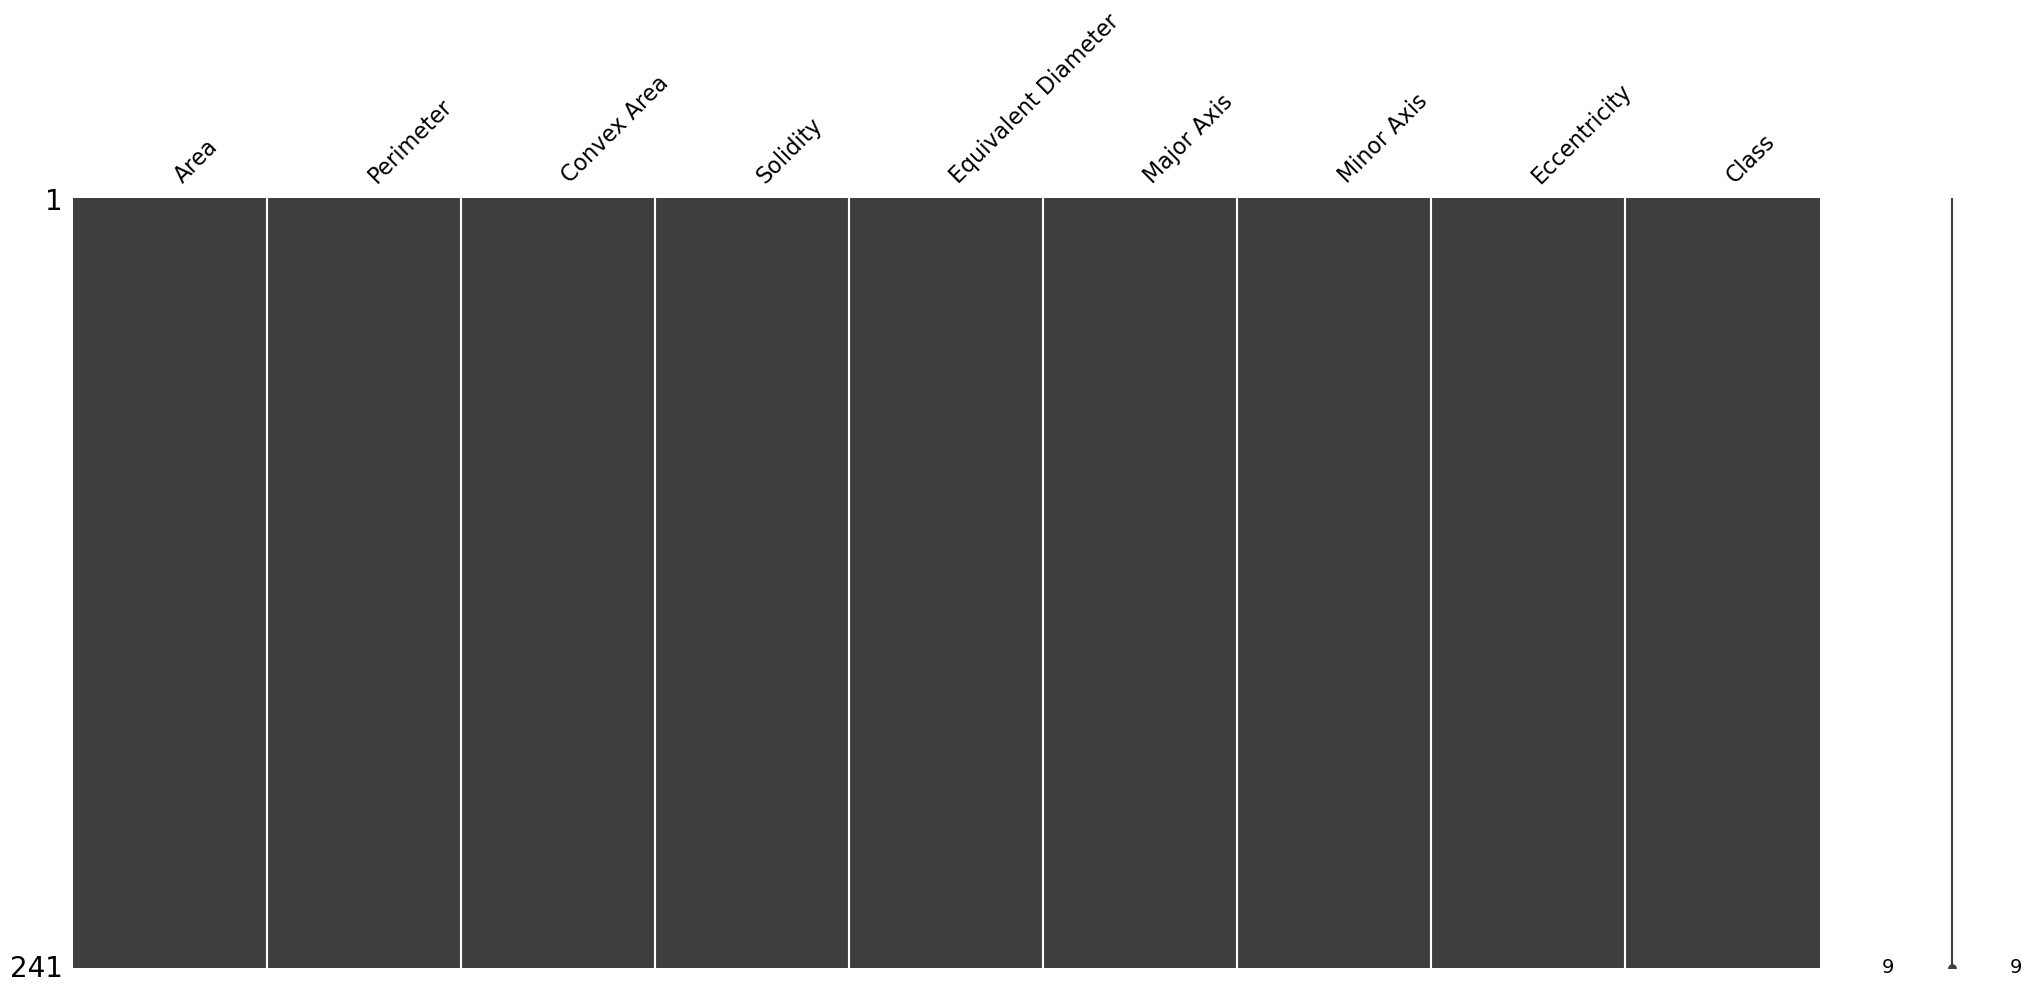

In [9]:
missingno.matrix(df)

##### there are 190 rows and 9 columns in the dataset

### checking datatye

In [114]:
df.dtypes

Area                   float64
Perimeter              float64
Convex Area            float64
Solidity               float64
Equivalent Diameter    float64
Major Axis             float64
Minor Axis             float64
Eccentricity            object
Class                    int64
dtype: object

### as class column is a classification column it is converted in to object datatype

### Type casting

In [56]:
#df['Class'] = df['Class'].astype = 'object'


In [115]:
# Convert to float
df['Eccentricity'] = pd.to_numeric(df['Eccentricity'], errors='coerce')
# Check the datatype after conversion
print(df['Eccentricity'].dtype)


float64


In [60]:
df.dtypes

Area                   float64
Perimeter              float64
Convex Area            float64
Solidity               float64
Equivalent Diameter    float64
Major Axis             float64
Minor Axis             float64
Eccentricity           float64
Class                   object
dtype: object

### 1. Missing values

In [117]:
df.isna().sum()

Area                     0
Perimeter                0
Convex Area              0
Solidity                 0
Equivalent Diameter      0
Major Axis               0
Minor Axis               0
Eccentricity           205
Class                    0
dtype: int64

In [20]:
df.drop('Eccentricity',axis = 1,inplace = True)

In [119]:
df.isna().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Class                  0
dtype: int64

**there are no null values in dataset**

### 2. checking for duplicates

In [120]:
df.duplicated().sum()

51

In [121]:
df.drop_duplicates(inplace = True)

In [122]:
df.duplicated().sum()

0

**as they are more duplicate values drop the duplicates** 

### 3. checking statistical analysis

In [123]:
df.describe()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Class
count,1.900000e+02,190.000000,1.900000e+02,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.523222e+04,527.502377,2.692173e+04,0.627155,72.329617,127.541023,250.244717,0.673684
std,9.008024e+04,718.352894,1.001998e+05,0.305307,119.321545,218.235508,1012.400816,0.470103
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.227500e+02,110.740114,4.731250e+02,0.417811,20.271060,17.834935,39.009347,0.000000
50%,1.284250e+03,249.521859,2.503500e+03,0.694451,40.435636,47.482395,77.125595,1.000000
75%,4.642750e+03,603.354900,1.037950e+04,0.901726,76.881499,158.806271,235.056065,1.000000
max,1.164150e+06,4453.521314,1.172680e+06,0.997361,1217.473538,1797.920654,13210.791016,1.000000


In [124]:
df.describe(include = 'all')

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Class
count,1.900000e+02,190.000000,1.900000e+02,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.523222e+04,527.502377,2.692173e+04,0.627155,72.329617,127.541023,250.244717,0.673684
std,9.008024e+04,718.352894,1.001998e+05,0.305307,119.321545,218.235508,1012.400816,0.470103
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.227500e+02,110.740114,4.731250e+02,0.417811,20.271060,17.834935,39.009347,0.000000
50%,1.284250e+03,249.521859,2.503500e+03,0.694451,40.435636,47.482395,77.125595,1.000000
75%,4.642750e+03,603.354900,1.037950e+04,0.901726,76.881499,158.806271,235.056065,1.000000
max,1.164150e+06,4453.521314,1.172680e+06,0.997361,1217.473538,1797.920654,13210.791016,1.000000


##### it show only categorical columns statistics

### Outliers

<Axes: >

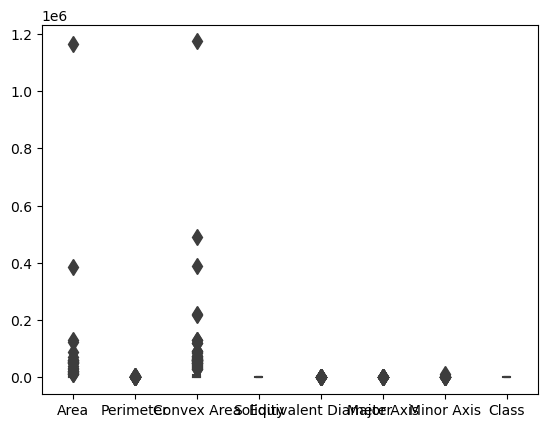

In [126]:
sns.boxplot(data = df ,width=0.11,fliersize=8)

### Zero variance scalar

In [16]:
df.columns

Index(['Area', 'Perimeter', 'Convex Area', 'Solidity', 'Equivalent Diameter',
       'Major Axis', 'Minor Axis', 'Eccentricity', 'Class'],
      dtype='object')

In [17]:
from sklearn .feature_selection import VarianceThreshold

In [127]:
df.var()

Area                   8.114450e+09
Perimeter              5.160309e+05
Convex Area            1.003999e+10
Solidity               9.321265e-02
Equivalent Diameter    1.423763e+04
Major Axis             4.762674e+04
Minor Axis             1.024955e+06
Class                  2.209969e-01
dtype: float64

### univariate Analysis

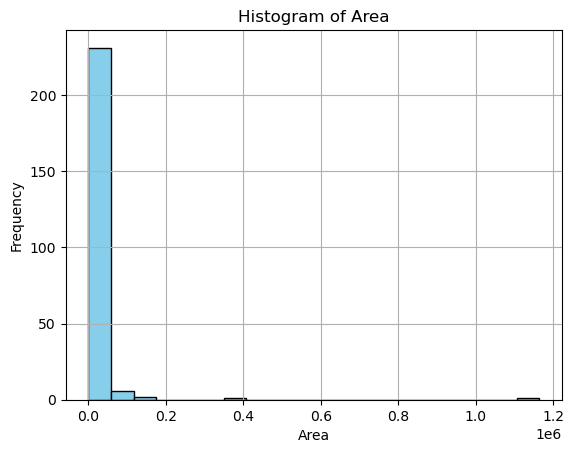

In [10]:
plt.hist(df['Area'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area')
plt.grid(True)
plt.show()


<Axes: >

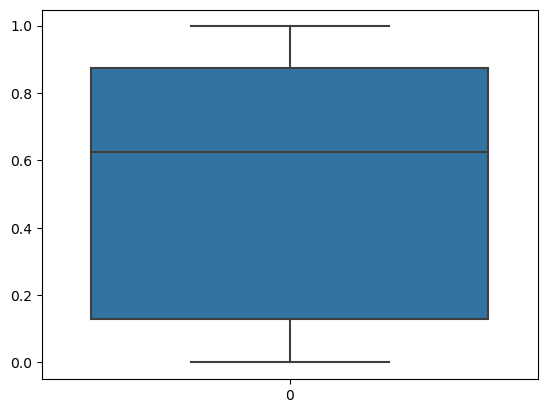

In [78]:
sns.boxplot(df['Solidity'])

In [11]:
df.columns

Index(['Area', 'Perimeter', 'Convex Area', 'Solidity', 'Equivalent Diameter',
       'Major Axis', 'Minor Axis', 'Eccentricity', 'Class'],
      dtype='object')

<Axes: xlabel='Solidity', ylabel='Class'>

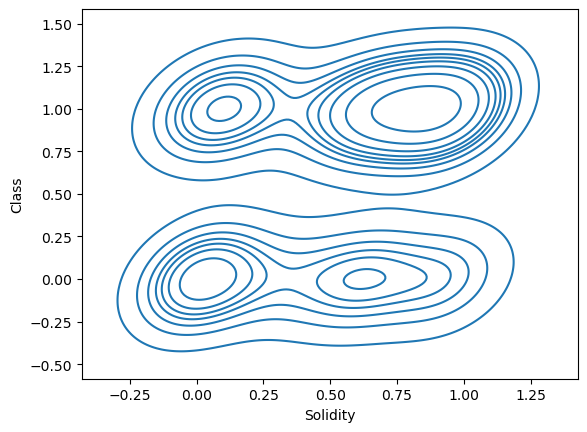

In [29]:
sns.kdeplot(data=df, x ='Solidity', y="Class")

### Based on solidity Tumuor detected is more

<Axes: >

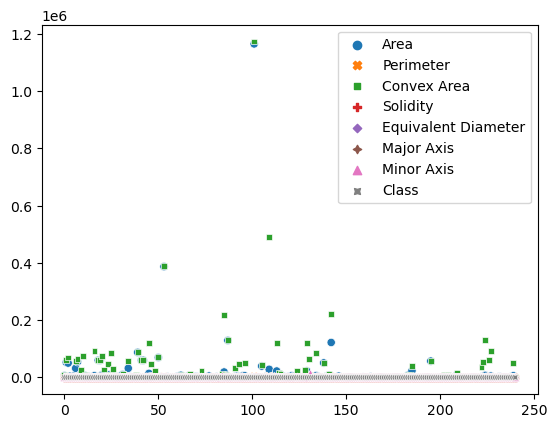

In [33]:
sns.scatterplot(data = df)

Pairplot

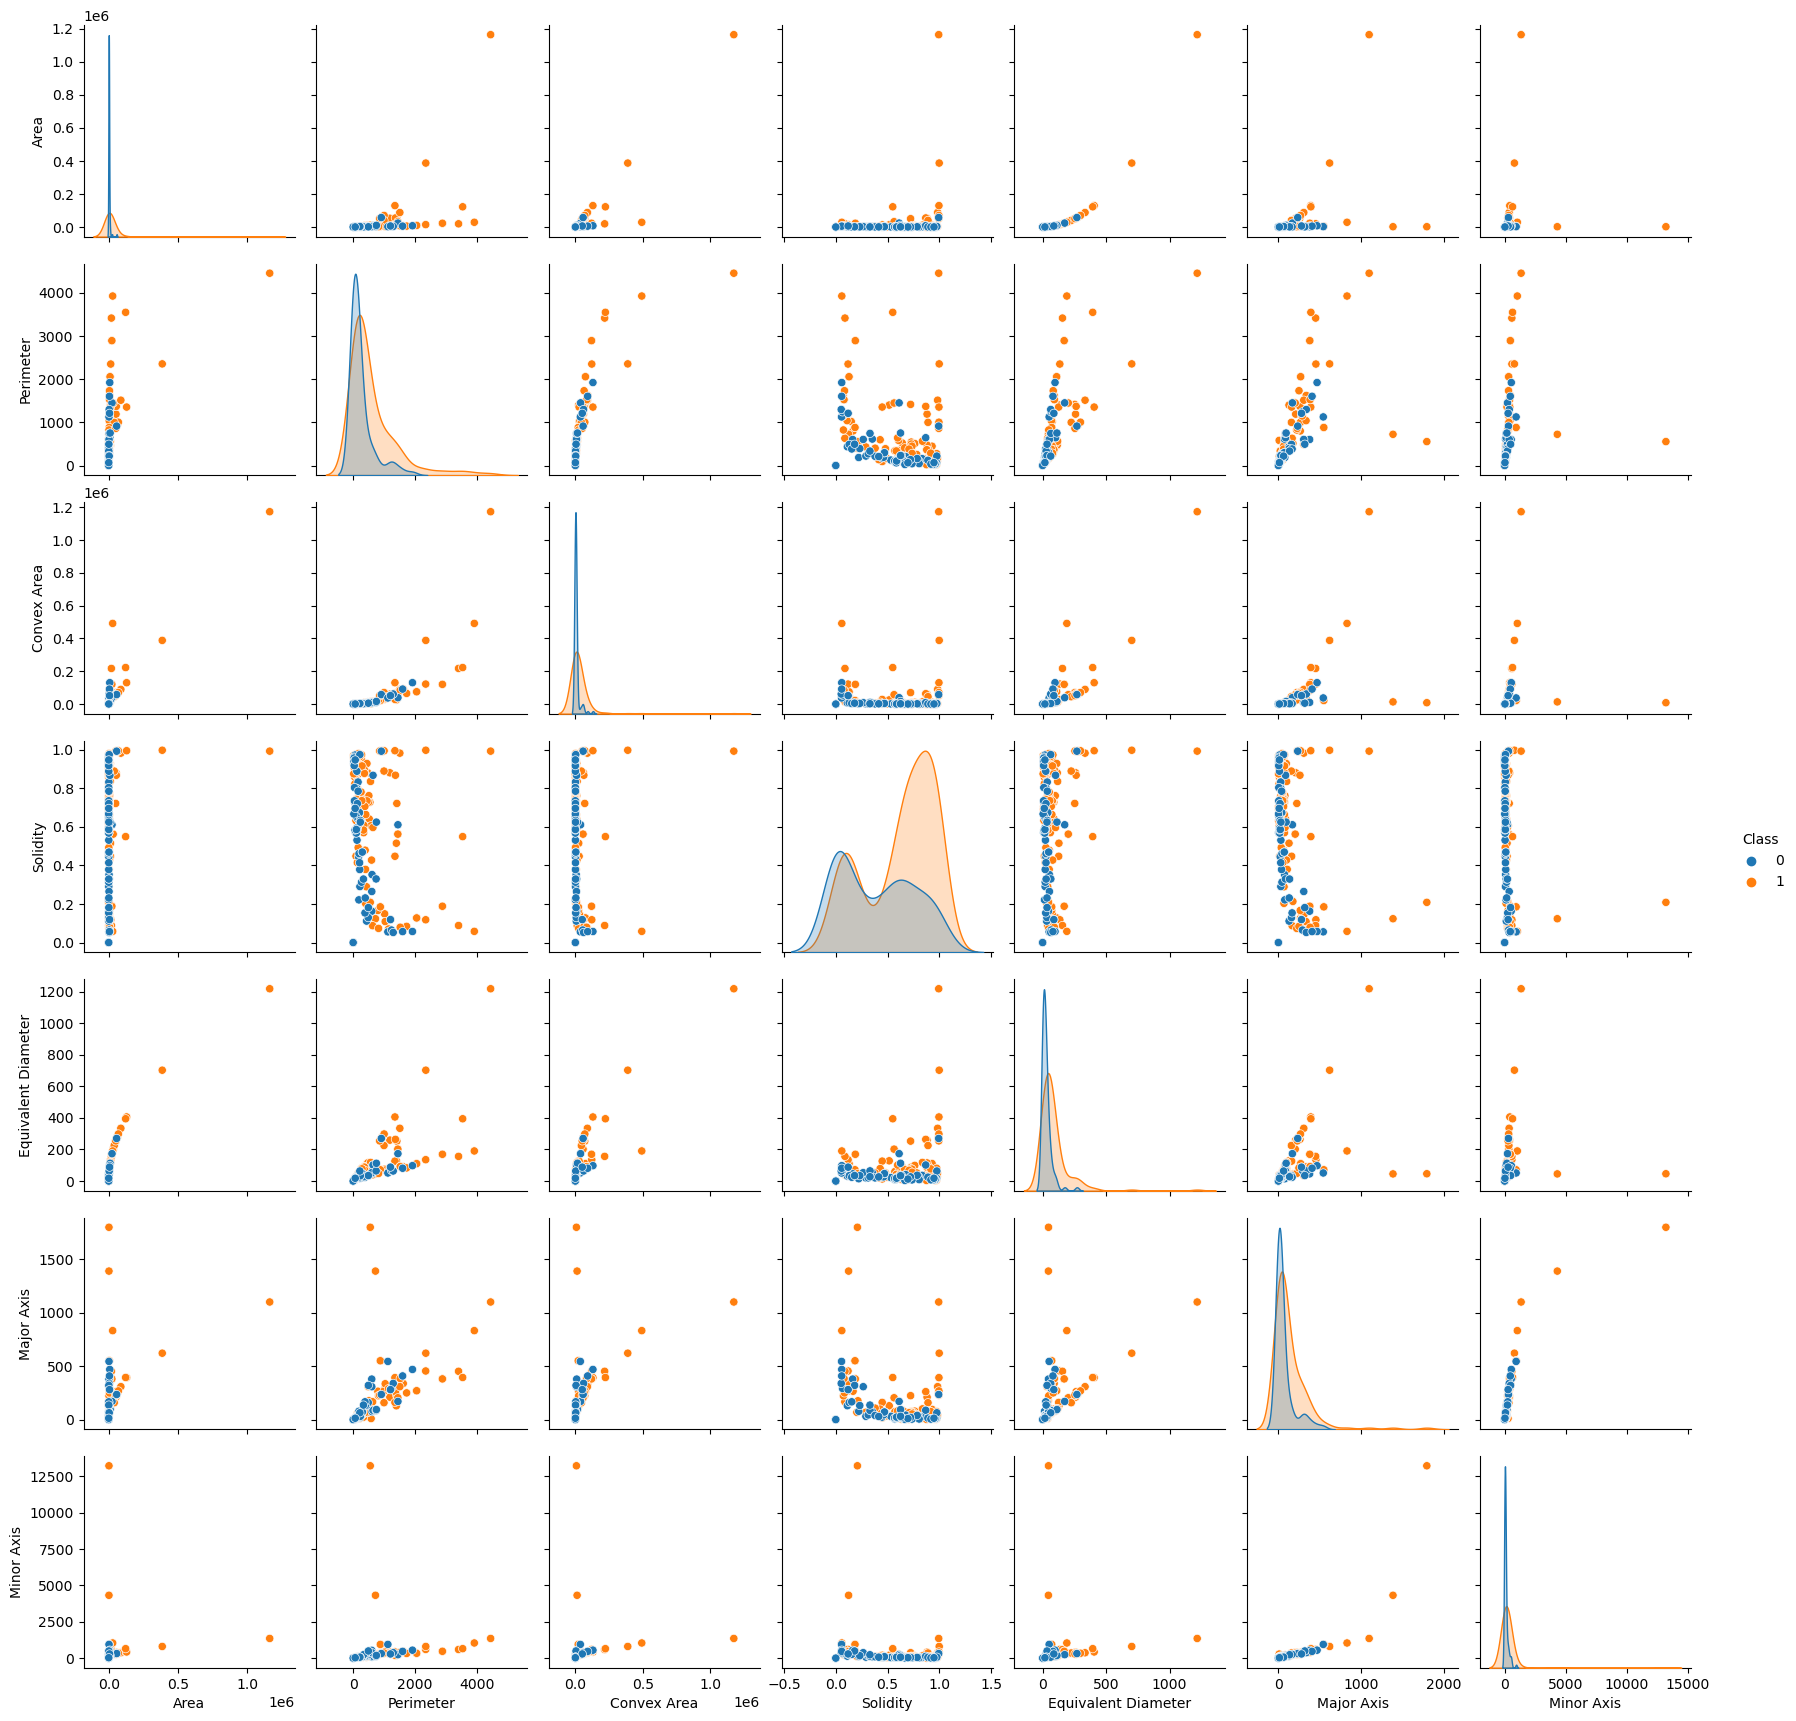

In [18]:
sns.pairplot(df,hue='Class')

###### it is showing relationship between all variables

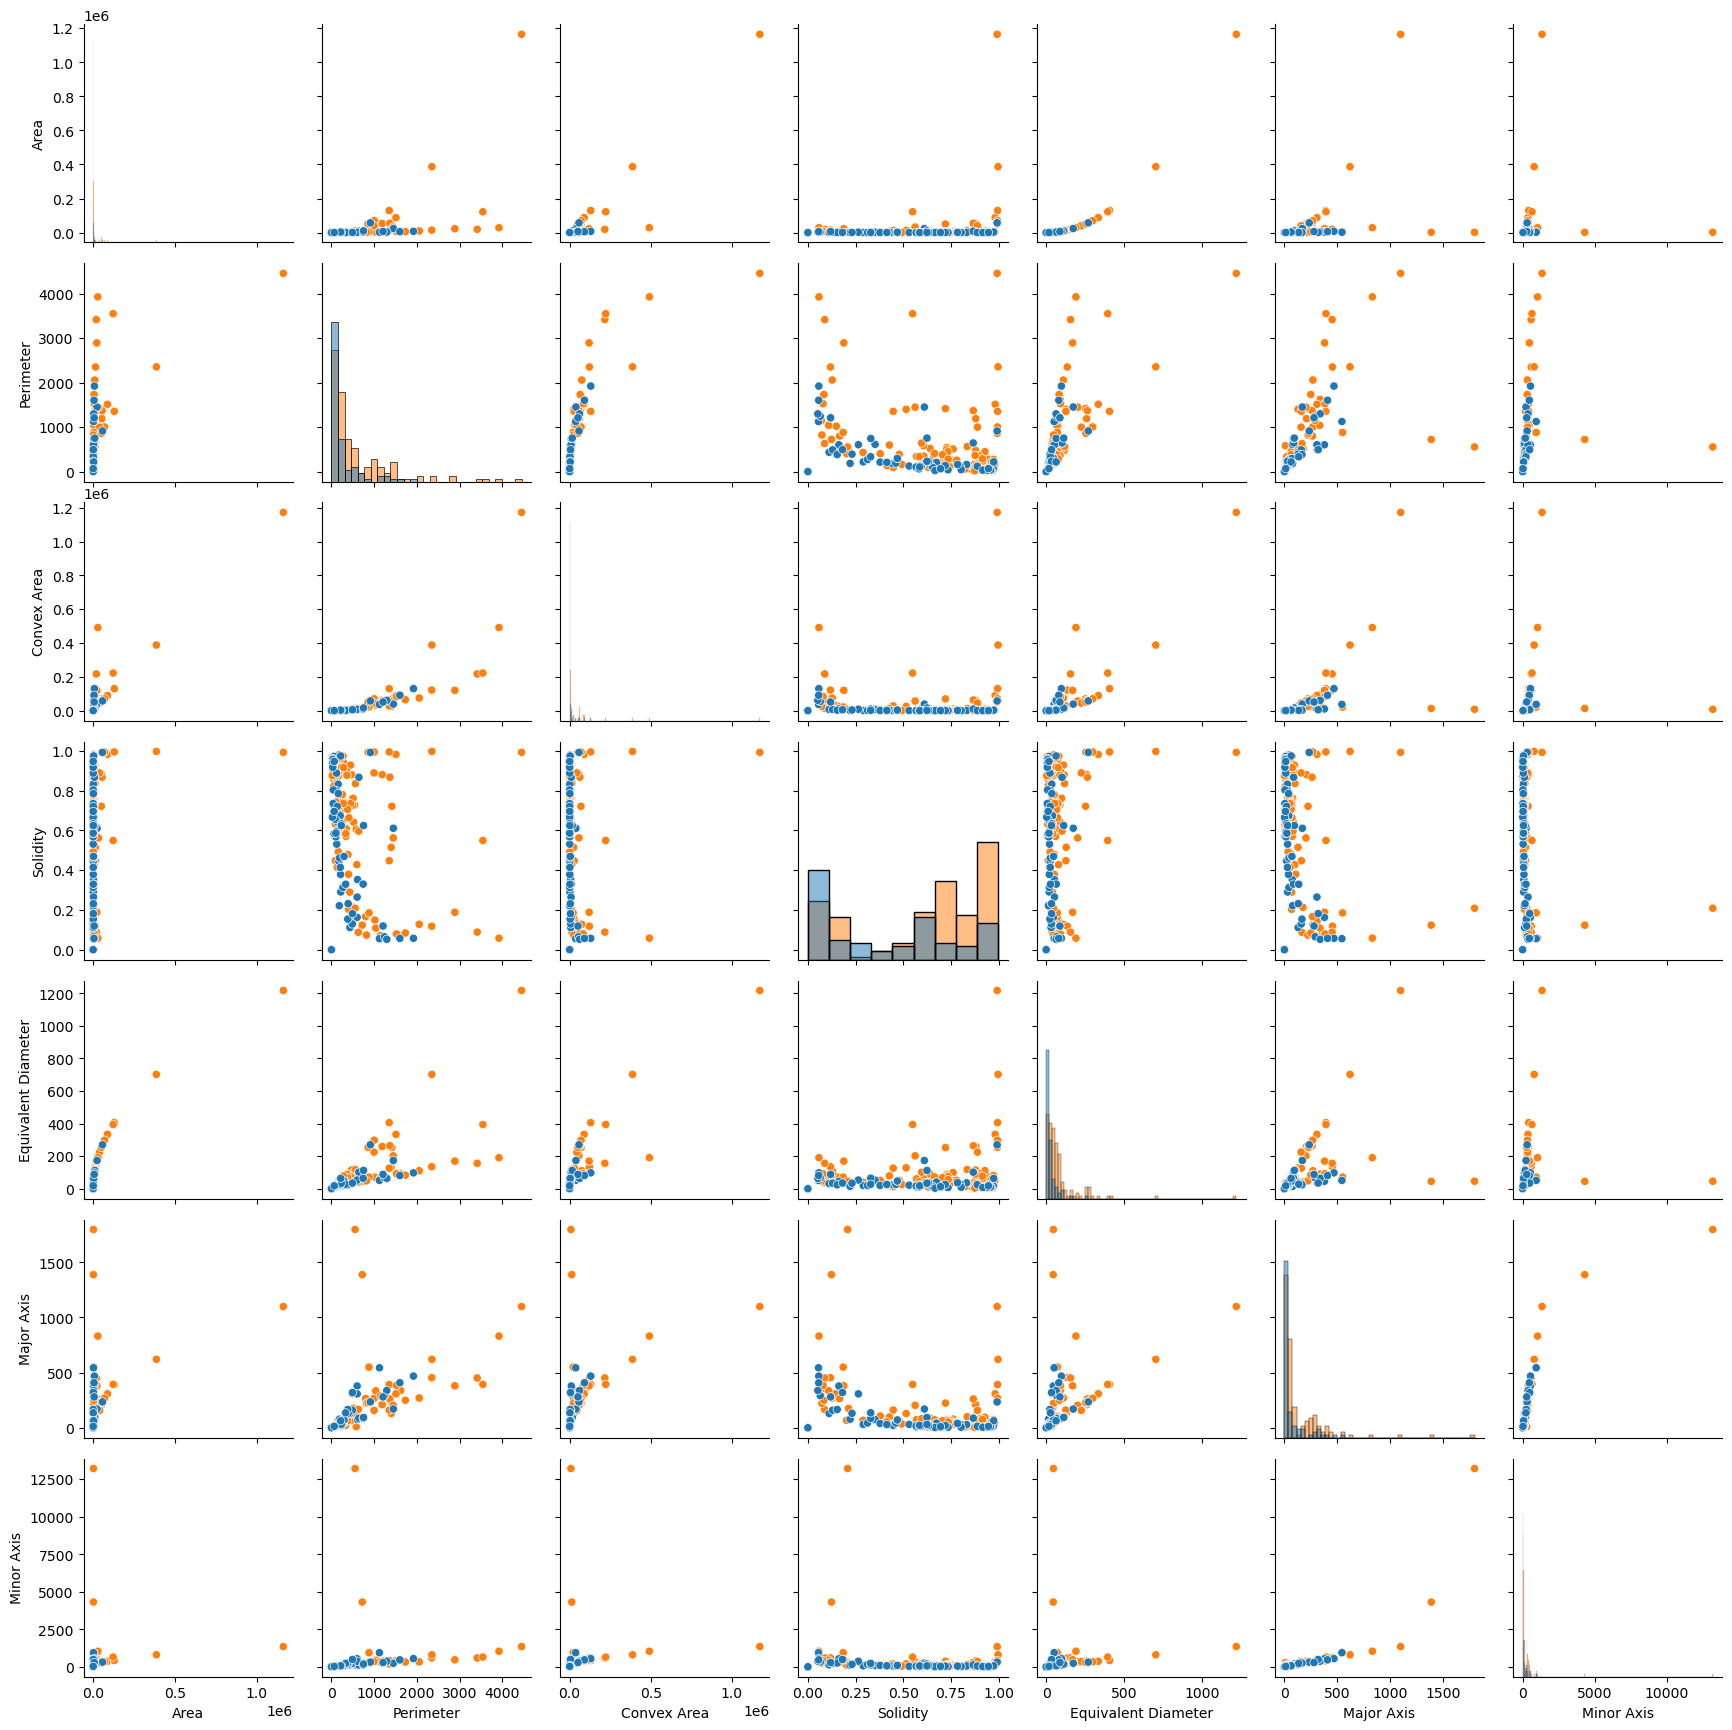

In [26]:
g = sns.PairGrid(data = df , hue = 'Class')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [45]:
df.columns

Index(['Area', 'Perimeter', 'Convex Area', 'Solidity', 'Equivalent Diameter',
       'Major Axis', 'Minor Axis', 'Class'],
      dtype='object')

#### chech if the data is following Normal Distribution or not

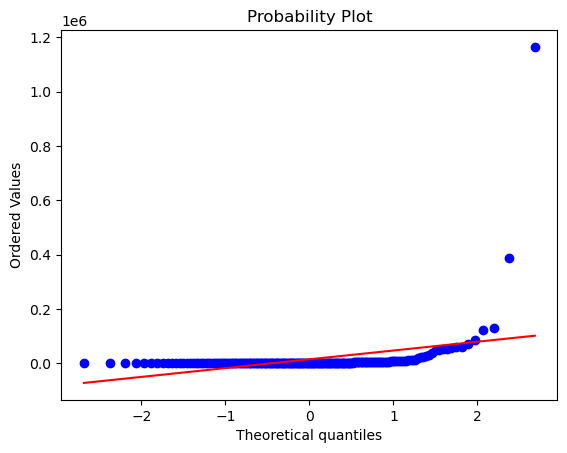

In [128]:
st.probplot(df['Area'],plot = plt)
plt.show()

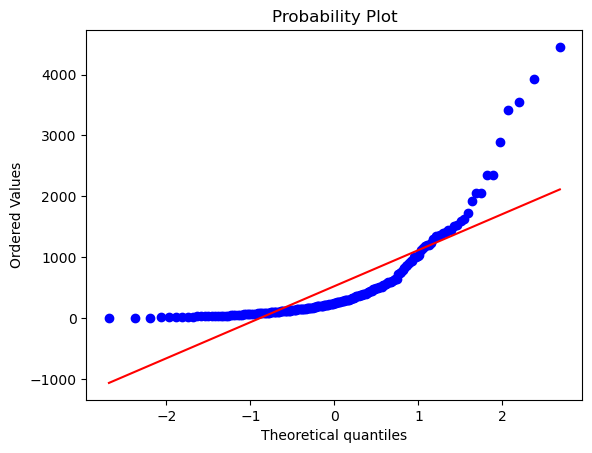

In [129]:
st.probplot(df['Perimeter'],plot = plt)
plt.show()

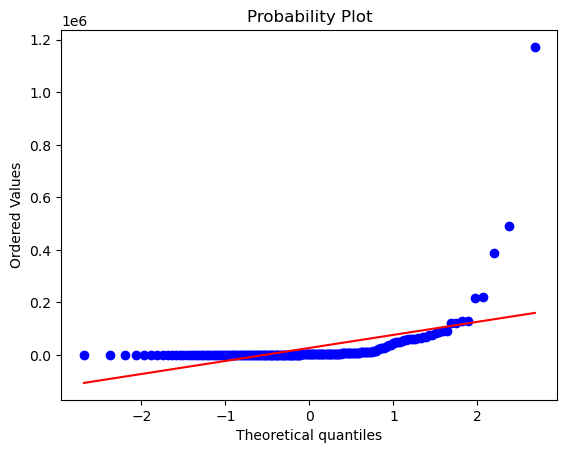

In [130]:
st.probplot(df['Convex Area'],plot = plt)
plt.show()

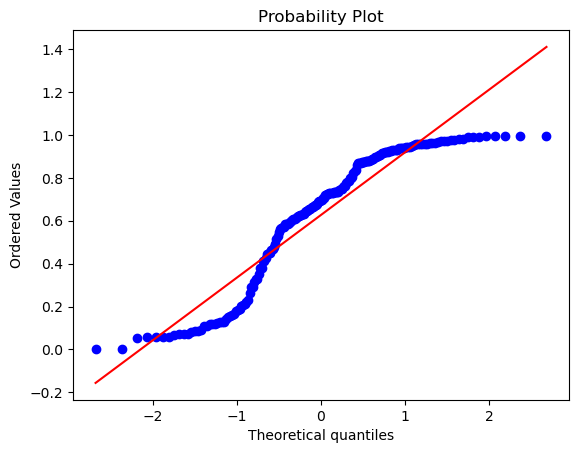

In [131]:
st.probplot(df['Solidity'],plot = plt)
plt.show()

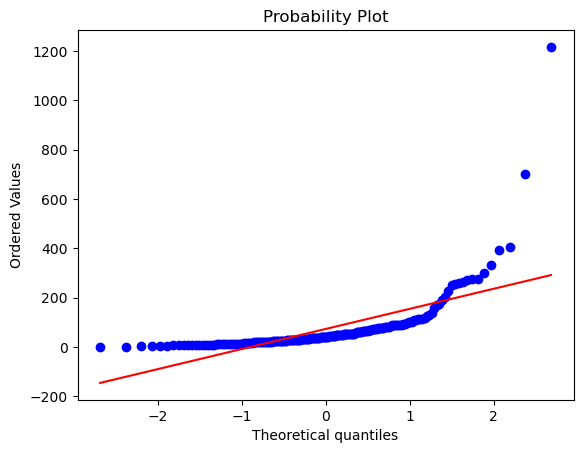

In [132]:
st.probplot(df['Equivalent Diameter'],plot = plt)
plt.show()

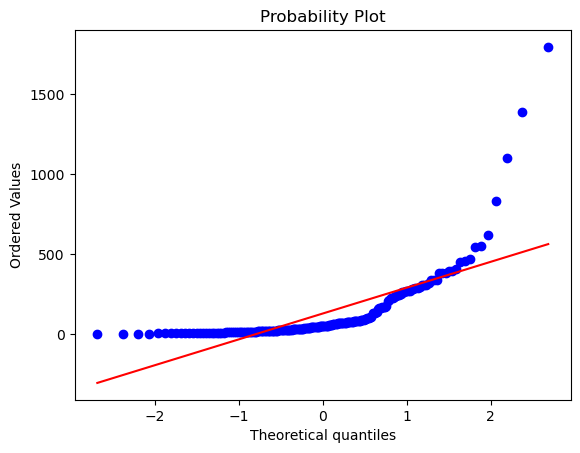

In [135]:
st.probplot(df['Major Axis'],plot = plt)
plt.show()


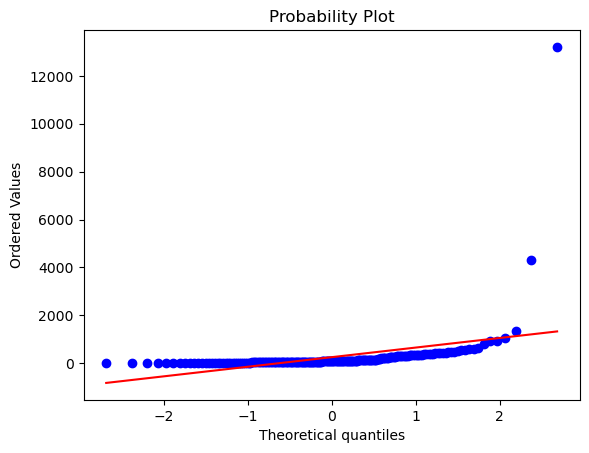

In [136]:
st.probplot(df['Minor Axis'],plot = plt)
plt.show()

### split the data

In [49]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=233)

In [62]:
X_train['Equivalent Diameter']=np.square(X_train['Equivalent Diameter'])
X_train['Major Axis']=np.square(X_train['Major Axis'])
X_test['Equivalent Diameter']=np.square(X_test['Equivalent Diameter'])
X_test['Major Axis']=np.square(X_test['Major Axis'])

In [63]:
df.dtypes

Area                   float64
Perimeter              float64
Convex Area            float64
Solidity               float64
Equivalent Diameter    float64
Major Axis             float64
Minor Axis             float64
Class                    int64
dtype: object

In [64]:
gnb =GaussianNB() 

In [65]:
gnb.fit(X_train,y_train)

GaussianNB()

In [66]:
y_pred = gnb.predict(X_test)

In [67]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,ConfusionMatrixDisplay

In [69]:
accuracy_score(y_test,y_pred)

0.5102040816326531

In [70]:
confusion_matrix(y_test,y_pred)

array([[19,  0],
       [24,  6]], dtype=int64)

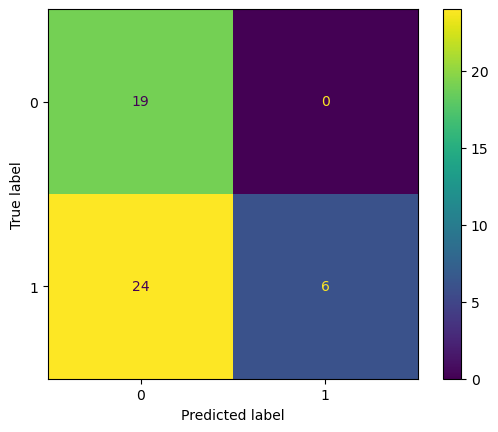

In [71]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

   0   1
0  tN fp
1  TN  TP